In [12]:
%matplotlib inline 
from scipy import stats
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np


In [27]:
vaccine_data_to_load = "vaccine-preventable-disease-cases-by-county-and-year-2.csv" 


#Read the Mouse and Drug Data and the Clinical Trial Data
Vax_Data = pd.read_csv("vaccine-preventable-disease-cases-by-county-and-year-2.csv") 
print(Vax_Data.iloc[:,1].unique())
file = 'Population_Data.csv'
pop_read = pd.read_csv(file)
pop_read
pop_years = pop_read.drop(['2018'], axis = 1)
pop_years_3 = pop_years.set_index("County")
pop_years_3

['Alameda' 'Alpine' 'Amador' 'Butte' 'Calaveras' 'California' 'Colusa'
 'Contra Costa' 'Del Norte' 'El Dorado' 'Fresno' 'Glenn' 'Humboldt'
 'Imperial' 'Inyo' 'Kern' 'Kings' 'Lake' 'Lassen' 'Los Angeles' 'Madera'
 'Marin' 'Mariposa' 'Mendocino' 'Merced' 'Modoc' 'Mono' 'Monterey' 'Napa'
 'Nevada' 'Orange' 'Placer' 'Plumas' 'Riverside' 'Sacramento' 'San Benito'
 'San Bernardino' 'San Diego' 'San Francisco' 'San Joaquin'
 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara' 'Santa Cruz'
 'Shasta' 'Sierra' 'Siskiyou' 'Solano' 'Sonoma' 'Stanislaus' 'Sutter'
 'Tehama' 'Trinity' 'Tulare' 'Tuolumne' 'Ventura' 'Yolo' 'Yuba']


,2009,2010,2011,2012,2013,2014,2015,2016,2017
County,,,,,,,,,
Alameda County,1491482,1513043,1530998,1554138,1580247,1608674,1634634,1650306,1658131
El Dorado County,178447,181133,180918,180578,181497,183161,184660,186082,188722
Kern County,807407,841072,848140,853963,862557,869957,877197,882361,888988
Los Angeles County,9848011,9822433,9876727,9938436,9998105,10048408,10097037,10120540,10118759
Merced County,245321,256732,259333,260971,262198,264649,266651,267971,271340
Napa County,134650,136808,137750,138625,139706,140567,141096,141185,140386
Orange County,3026786,3016559,3050867,3080419,3108009,3130322,3153962,3170707,3179950
Sacramento County,1400949,1421414,1433739,1445078,1457750,1475618,1494294,1511510,1527718
San Diego County,3053793,3103306,3137372,3175201,3211248,3250993,3284061,3310280,3325468


In [14]:

#dd_complete_15_pivot = dd_complete_15.pivot_table(index = "year", columns = "Drug")


In [15]:
#dd_drop = Vax_Data.groupby("disease").first()
#dd_drop.drop(["Diphtheria","Hepatitis A", "Hepatitis B, Acute", "Hepatitis C, Acute", "Invasive Meningococcal Disease", "Rubella", "Varicella Hospitalizations"])
dd = Vax_Data.set_index("disease")
dd_drop = dd.drop(["Diphtheria","Hepatitis A", "Hepatitis B, Acute", "Hepatitis C, Acute", "Invasive Meningococcal Disease", "Rubella", "Varicella Hospitalizations"])
dd_drop = dd_drop.reset_index()
dd_drop_counties = dd_drop.set_index("county")

dd_complete_4 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kern' ,'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa',
 'Nevada' ,'Orange', 'Placer' ,'Plumas', 'Riverside', 'Sacramento' ,'San Benito',
 'San Bernardino', 'San Diego' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo', 'San Mateo', 'Santa Barbara' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' ,'Sierra', 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura' ,'Yolo'])
dd_complete_4 = dd_complete_4.reset_index()

dd_complete_15 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Modoc', 'Mono', 'Monterey',
 'Nevada' , 'Placer' ,'Plumas', 'Riverside' ,'San Benito',
 'San Bernardino' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' , 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne' ,'Yolo'])
dd_complete_15 = dd_complete_15.reset_index()

print(dd_complete_4.head())
dd_complete_15



    county  disease  year  count
0  Alameda  Measles  2001      1
1  Alameda  Measles  2002      0
2  Alameda  Measles  2003      2
3  Alameda  Measles  2004      0
4  Alameda  Measles  2005      0


,county,disease,year,count
0,Alameda,Measles,2001,1
1,Alameda,Measles,2002,0
2,Alameda,Measles,2003,2
3,Alameda,Measles,2004,0
4,Alameda,Measles,2005,0
5,Alameda,Measles,2006,1
6,Alameda,Measles,2007,0
7,Alameda,Measles,2008,0
8,Alameda,Measles,2009,0
9,Alameda,Measles,2010,2


In [16]:
dd_complete_4.count()


county     236
disease    236
year       236
count      236
dtype: int64

In [17]:

dd_years_09 = dd_complete_15[dd_complete_15["year"]== 2009]
dd_years_10 = dd_complete_15[dd_complete_15["year"]== 2010]
dd_years_11 = dd_complete_15[dd_complete_15["year"]== 2011]
dd_years_12 = dd_complete_15[dd_complete_15["year"]== 2012]
dd_years_13 = dd_complete_15[dd_complete_15["year"]== 2003]
dd_years_14 = dd_complete_15[dd_complete_15["year"]== 2014]
dd_years_15 = dd_complete_15[dd_complete_15["year"]== 2015]
dd_years_16 = dd_complete_15[dd_complete_15["year"]== 2016]
dd_years_17 = dd_complete_15[dd_complete_15["year"]== 2017]

#2009 and 2013 only have 45 data points per column, all the other years have 60 
#dd_measles_09 = dd_years_09[dd_years_09["disease"]== "Measles"]
dd_measles_10 = dd_years_10[dd_years_10["disease"]== "Measles"]


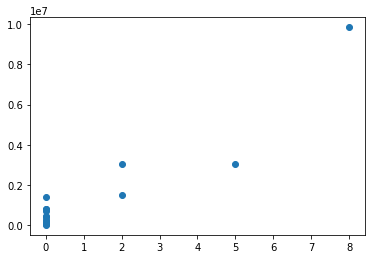

In [30]:
#plt.scatter(pop_years_3.iloc[1,:], dd_measles_09.iloc[:,3])
plt.scatter(pop_years_3.iloc[:,0], dd_measles_10.iloc[:,3])